## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.95407 | train_mse: 1.21976 | train_mae: 0.80755 |  0:00:01s


epoch 1  | loss: 0.32009 | train_mse: 0.37417 | train_mae: 0.48025 |  0:00:02s


epoch 2  | loss: 0.2086  | train_mse: 0.24735 | train_mae: 0.37824 |  0:00:02s


epoch 3  | loss: 0.23276 | train_mse: 0.23666 | train_mae: 0.36044 |  0:00:03s


epoch 4  | loss: 0.17021 | train_mse: 0.13064 | train_mae: 0.27312 |  0:00:04s


epoch 5  | loss: 0.13474 | train_mse: 0.0916  | train_mae: 0.2331  |  0:00:04s


epoch 6  | loss: 0.12173 | train_mse: 0.08448 | train_mae: 0.22821 |  0:00:05s


epoch 7  | loss: 0.11727 | train_mse: 0.06884 | train_mae: 0.20713 |  0:00:06s


epoch 8  | loss: 0.11355 | train_mse: 0.0794  | train_mae: 0.22366 |  0:00:06s


epoch 9  | loss: 0.12315 | train_mse: 0.08854 | train_mae: 0.22977 |  0:00:07s


epoch 10 | loss: 0.09593 | train_mse: 0.06057 | train_mae: 0.19803 |  0:00:07s


epoch 11 | loss: 0.10713 | train_mse: 0.06117 | train_mae: 0.19921 |  0:00:08s


epoch 12 | loss: 0.07983 | train_mse: 0.05306 | train_mae: 0.18755 |  0:00:09s


epoch 13 | loss: 0.09204 | train_mse: 0.04891 | train_mae: 0.17504 |  0:00:09s


epoch 14 | loss: 0.08628 | train_mse: 0.04089 | train_mae: 0.1624  |  0:00:10s


epoch 15 | loss: 0.09279 | train_mse: 0.05285 | train_mae: 0.18126 |  0:00:10s


epoch 16 | loss: 0.07953 | train_mse: 0.05099 | train_mae: 0.17634 |  0:00:11s


epoch 17 | loss: 0.07201 | train_mse: 0.04063 | train_mae: 0.16021 |  0:00:11s


epoch 18 | loss: 0.07554 | train_mse: 0.03945 | train_mae: 0.1563  |  0:00:12s


epoch 19 | loss: 0.08278 | train_mse: 0.04417 | train_mae: 0.16578 |  0:00:13s


epoch 20 | loss: 0.10229 | train_mse: 0.04141 | train_mae: 0.16252 |  0:00:13s


epoch 21 | loss: 0.07874 | train_mse: 0.04663 | train_mae: 0.16332 |  0:00:14s


epoch 22 | loss: 0.08276 | train_mse: 0.05184 | train_mae: 0.18361 |  0:00:14s


epoch 23 | loss: 0.08616 | train_mse: 0.04751 | train_mae: 0.17139 |  0:00:15s


epoch 24 | loss: 0.08215 | train_mse: 0.03786 | train_mae: 0.1507  |  0:00:15s


epoch 25 | loss: 0.06695 | train_mse: 0.03804 | train_mae: 0.15138 |  0:00:16s


epoch 26 | loss: 0.06817 | train_mse: 0.03732 | train_mae: 0.1519  |  0:00:16s


epoch 27 | loss: 0.06937 | train_mse: 0.03566 | train_mae: 0.14497 |  0:00:17s


epoch 28 | loss: 0.06488 | train_mse: 0.03046 | train_mae: 0.1305  |  0:00:18s


epoch 29 | loss: 0.08292 | train_mse: 0.04351 | train_mae: 0.16162 |  0:00:18s


epoch 30 | loss: 0.07457 | train_mse: 0.06947 | train_mae: 0.19393 |  0:00:19s


epoch 31 | loss: 0.08101 | train_mse: 0.03831 | train_mae: 0.15188 |  0:00:19s


epoch 32 | loss: 0.082   | train_mse: 0.03398 | train_mae: 0.14464 |  0:00:20s


epoch 33 | loss: 0.07792 | train_mse: 0.06736 | train_mae: 0.19371 |  0:00:20s


epoch 34 | loss: 0.07085 | train_mse: 0.05831 | train_mae: 0.18664 |  0:00:21s


epoch 35 | loss: 0.07283 | train_mse: 0.05104 | train_mae: 0.18212 |  0:00:21s


epoch 36 | loss: 0.05966 | train_mse: 0.03877 | train_mae: 0.15415 |  0:00:22s


epoch 37 | loss: 0.06772 | train_mse: 0.04067 | train_mae: 0.15095 |  0:00:23s


epoch 38 | loss: 0.06087 | train_mse: 0.03229 | train_mae: 0.13324 |  0:00:23s


epoch 39 | loss: 0.07156 | train_mse: 0.04506 | train_mae: 0.1652  |  0:00:24s


epoch 40 | loss: 0.06915 | train_mse: 0.05989 | train_mae: 0.1964  |  0:00:24s


epoch 41 | loss: 0.09392 | train_mse: 0.04675 | train_mae: 0.17036 |  0:00:25s


epoch 42 | loss: 0.06389 | train_mse: 0.03059 | train_mae: 0.12652 |  0:00:25s


epoch 43 | loss: 0.04614 | train_mse: 0.01589 | train_mae: 0.09591 |  0:00:26s


epoch 44 | loss: 0.05015 | train_mse: 0.03954 | train_mae: 0.14254 |  0:00:26s


epoch 45 | loss: 0.08813 | train_mse: 0.02713 | train_mae: 0.12694 |  0:00:27s


epoch 46 | loss: 0.06911 | train_mse: 0.02766 | train_mae: 0.12717 |  0:00:28s


epoch 47 | loss: 0.06206 | train_mse: 0.0441  | train_mae: 0.14776 |  0:00:28s


epoch 48 | loss: 0.0518  | train_mse: 0.04572 | train_mae: 0.15709 |  0:00:29s


epoch 49 | loss: 0.08114 | train_mse: 0.035   | train_mae: 0.14963 |  0:00:29s


epoch 50 | loss: 0.06064 | train_mse: 0.03127 | train_mae: 0.12999 |  0:00:30s


epoch 51 | loss: 0.05549 | train_mse: 0.0259  | train_mae: 0.11521 |  0:00:30s


epoch 52 | loss: 0.06064 | train_mse: 0.03224 | train_mae: 0.13824 |  0:00:31s


epoch 53 | loss: 0.05714 | train_mse: 0.02455 | train_mae: 0.11771 |  0:00:32s


epoch 54 | loss: 0.05269 | train_mse: 0.03521 | train_mae: 0.15113 |  0:00:32s


epoch 55 | loss: 0.05236 | train_mse: 0.03824 | train_mae: 0.15966 |  0:00:33s


epoch 56 | loss: 0.05801 | train_mse: 0.02264 | train_mae: 0.11374 |  0:00:33s


epoch 57 | loss: 0.05309 | train_mse: 0.02004 | train_mae: 0.09893 |  0:00:34s


epoch 58 | loss: 0.045   | train_mse: 0.02579 | train_mae: 0.11906 |  0:00:35s


epoch 59 | loss: 0.04936 | train_mse: 0.02654 | train_mae: 0.11925 |  0:00:36s


epoch 60 | loss: 0.08068 | train_mse: 0.03458 | train_mae: 0.14718 |  0:00:36s


epoch 61 | loss: 0.05859 | train_mse: 0.0208  | train_mae: 0.11605 |  0:00:37s


epoch 62 | loss: 0.04526 | train_mse: 0.02912 | train_mae: 0.12674 |  0:00:37s


epoch 63 | loss: 0.08181 | train_mse: 0.02776 | train_mae: 0.12556 |  0:00:38s


epoch 64 | loss: 0.05617 | train_mse: 0.01765 | train_mae: 0.09948 |  0:00:39s


epoch 65 | loss: 0.0561  | train_mse: 0.02781 | train_mae: 0.12485 |  0:00:39s


epoch 66 | loss: 0.08452 | train_mse: 0.03897 | train_mae: 0.13932 |  0:00:40s


epoch 67 | loss: 0.04687 | train_mse: 0.02746 | train_mae: 0.1251  |  0:00:40s


epoch 68 | loss: 0.04575 | train_mse: 0.02074 | train_mae: 0.1068  |  0:00:41s


epoch 69 | loss: 0.04933 | train_mse: 0.01756 | train_mae: 0.09511 |  0:00:41s


epoch 70 | loss: 0.05795 | train_mse: 0.01582 | train_mae: 0.09102 |  0:00:42s


epoch 71 | loss: 0.05048 | train_mse: 0.01577 | train_mae: 0.09417 |  0:00:42s


epoch 72 | loss: 0.03951 | train_mse: 0.01655 | train_mae: 0.09607 |  0:00:43s


epoch 73 | loss: 0.04838 | train_mse: 0.02123 | train_mae: 0.11052 |  0:00:44s


epoch 74 | loss: 0.05452 | train_mse: 0.02241 | train_mae: 0.11292 |  0:00:44s


epoch 75 | loss: 0.04555 | train_mse: 0.03387 | train_mae: 0.13749 |  0:00:45s


epoch 76 | loss: 0.04404 | train_mse: 0.02416 | train_mae: 0.11027 |  0:00:45s


epoch 77 | loss: 0.04947 | train_mse: 0.02388 | train_mae: 0.11171 |  0:00:46s


epoch 78 | loss: 0.0594  | train_mse: 0.02121 | train_mae: 0.10678 |  0:00:46s


epoch 79 | loss: 0.05141 | train_mse: 0.02637 | train_mae: 0.12431 |  0:00:47s


epoch 80 | loss: 0.06165 | train_mse: 0.02676 | train_mae: 0.12231 |  0:00:47s


epoch 81 | loss: 0.0557  | train_mse: 0.01602 | train_mae: 0.09338 |  0:00:48s


epoch 82 | loss: 0.05449 | train_mse: 0.01925 | train_mae: 0.10449 |  0:00:48s


epoch 83 | loss: 0.04909 | train_mse: 0.016   | train_mae: 0.09515 |  0:00:49s


epoch 84 | loss: 0.03685 | train_mse: 0.01325 | train_mae: 0.09216 |  0:00:50s


epoch 85 | loss: 0.03628 | train_mse: 0.01609 | train_mae: 0.09833 |  0:00:50s


epoch 86 | loss: 0.03609 | train_mse: 0.01238 | train_mae: 0.08652 |  0:00:51s


epoch 87 | loss: 0.04917 | train_mse: 0.01608 | train_mae: 0.10797 |  0:00:51s


epoch 88 | loss: 0.04108 | train_mse: 0.01354 | train_mae: 0.09539 |  0:00:52s


epoch 89 | loss: 0.04883 | train_mse: 0.01212 | train_mae: 0.09018 |  0:00:52s


epoch 90 | loss: 0.05078 | train_mse: 0.02476 | train_mae: 0.12074 |  0:00:53s


epoch 91 | loss: 0.04398 | train_mse: 0.01999 | train_mae: 0.10375 |  0:00:54s


epoch 92 | loss: 0.03538 | train_mse: 0.02167 | train_mae: 0.1156  |  0:00:54s


epoch 93 | loss: 0.05484 | train_mse: 0.01016 | train_mae: 0.07676 |  0:00:55s


epoch 94 | loss: 0.04015 | train_mse: 0.01468 | train_mae: 0.09844 |  0:00:55s


epoch 95 | loss: 0.03983 | train_mse: 0.01787 | train_mae: 0.10482 |  0:00:56s


epoch 96 | loss: 0.04127 | train_mse: 0.01475 | train_mae: 0.09587 |  0:00:56s


epoch 97 | loss: 0.0404  | train_mse: 0.02756 | train_mae: 0.1319  |  0:00:57s


epoch 98 | loss: 0.05067 | train_mse: 0.0185  | train_mae: 0.10553 |  0:00:57s


epoch 99 | loss: 0.04584 | train_mse: 0.01194 | train_mae: 0.08835 |  0:00:58s


epoch 100| loss: 0.03994 | train_mse: 0.02212 | train_mae: 0.1032  |  0:00:59s


epoch 101| loss: 0.05413 | train_mse: 0.01387 | train_mae: 0.09548 |  0:00:59s


epoch 102| loss: 0.05248 | train_mse: 0.02422 | train_mae: 0.11625 |  0:01:00s


epoch 103| loss: 0.05248 | train_mse: 0.02568 | train_mae: 0.12136 |  0:01:00s


epoch 104| loss: 0.03464 | train_mse: 0.0233  | train_mae: 0.10915 |  0:01:01s


epoch 105| loss: 0.04973 | train_mse: 0.03194 | train_mae: 0.13303 |  0:01:02s


epoch 106| loss: 0.04321 | train_mse: 0.01912 | train_mae: 0.10856 |  0:01:02s


epoch 107| loss: 0.04485 | train_mse: 0.01296 | train_mae: 0.08699 |  0:01:03s


epoch 108| loss: 0.03285 | train_mse: 0.01278 | train_mae: 0.09143 |  0:01:03s


epoch 109| loss: 0.05125 | train_mse: 0.01324 | train_mae: 0.09476 |  0:01:04s


epoch 110| loss: 0.03977 | train_mse: 0.01553 | train_mae: 0.09304 |  0:01:04s


epoch 111| loss: 0.0364  | train_mse: 0.02062 | train_mae: 0.10873 |  0:01:05s


epoch 112| loss: 0.03834 | train_mse: 0.00949 | train_mae: 0.07504 |  0:01:05s


epoch 113| loss: 0.04873 | train_mse: 0.01164 | train_mae: 0.08763 |  0:01:06s


epoch 114| loss: 0.04191 | train_mse: 0.01893 | train_mae: 0.10609 |  0:01:07s


epoch 115| loss: 0.03413 | train_mse: 0.02601 | train_mae: 0.11942 |  0:01:07s


epoch 116| loss: 0.03307 | train_mse: 0.01332 | train_mae: 0.08248 |  0:01:08s


epoch 117| loss: 0.0395  | train_mse: 0.01819 | train_mae: 0.10871 |  0:01:08s


epoch 118| loss: 0.03957 | train_mse: 0.01598 | train_mae: 0.08596 |  0:01:09s


epoch 119| loss: 0.03271 | train_mse: 0.01597 | train_mae: 0.09063 |  0:01:09s


epoch 120| loss: 0.04526 | train_mse: 0.01537 | train_mae: 0.10179 |  0:01:10s


epoch 121| loss: 0.03783 | train_mse: 0.01091 | train_mae: 0.08053 |  0:01:10s


epoch 122| loss: 0.03315 | train_mse: 0.01155 | train_mae: 0.08447 |  0:01:11s


epoch 123| loss: 0.02419 | train_mse: 0.0122  | train_mae: 0.0885  |  0:01:11s


epoch 124| loss: 0.03597 | train_mse: 0.01982 | train_mae: 0.11107 |  0:01:12s


epoch 125| loss: 0.03935 | train_mse: 0.01299 | train_mae: 0.09154 |  0:01:13s


epoch 126| loss: 0.04254 | train_mse: 0.01322 | train_mae: 0.09412 |  0:01:13s


epoch 127| loss: 0.03678 | train_mse: 0.01511 | train_mae: 0.10085 |  0:01:14s


epoch 128| loss: 0.04706 | train_mse: 0.01892 | train_mae: 0.10539 |  0:01:14s


epoch 129| loss: 0.04704 | train_mse: 0.02267 | train_mae: 0.12111 |  0:01:15s


epoch 130| loss: 0.04114 | train_mse: 0.04324 | train_mae: 0.15613 |  0:01:15s


epoch 131| loss: 0.05561 | train_mse: 0.01955 | train_mae: 0.10604 |  0:01:16s


epoch 132| loss: 0.05312 | train_mse: 0.01384 | train_mae: 0.09304 |  0:01:16s


epoch 133| loss: 0.0637  | train_mse: 0.01734 | train_mae: 0.0959  |  0:01:17s


epoch 134| loss: 0.03432 | train_mse: 0.01245 | train_mae: 0.09023 |  0:01:18s


epoch 135| loss: 0.03716 | train_mse: 0.01919 | train_mae: 0.10011 |  0:01:18s


epoch 136| loss: 0.03152 | train_mse: 0.01151 | train_mae: 0.08233 |  0:01:19s


epoch 137| loss: 0.04951 | train_mse: 0.02187 | train_mae: 0.11957 |  0:01:19s


epoch 138| loss: 0.04043 | train_mse: 0.01125 | train_mae: 0.08547 |  0:01:20s


epoch 139| loss: 0.03538 | train_mse: 0.01495 | train_mae: 0.09136 |  0:01:20s


epoch 140| loss: 0.03476 | train_mse: 0.01907 | train_mae: 0.0987  |  0:01:21s


epoch 141| loss: 0.03173 | train_mse: 0.0247  | train_mae: 0.12421 |  0:01:21s


epoch 142| loss: 0.02736 | train_mse: 0.00834 | train_mae: 0.06839 |  0:01:22s


epoch 143| loss: 0.03483 | train_mse: 0.01236 | train_mae: 0.08856 |  0:01:23s


epoch 144| loss: 0.04525 | train_mse: 0.02599 | train_mae: 0.11668 |  0:01:23s


epoch 145| loss: 0.03005 | train_mse: 0.01954 | train_mae: 0.09835 |  0:01:24s


epoch 146| loss: 0.04264 | train_mse: 0.02812 | train_mae: 0.12084 |  0:01:24s


epoch 147| loss: 0.03915 | train_mse: 0.02514 | train_mae: 0.12163 |  0:01:25s


epoch 148| loss: 0.03162 | train_mse: 0.00856 | train_mae: 0.07246 |  0:01:25s


epoch 149| loss: 0.04186 | train_mse: 0.02062 | train_mae: 0.10692 |  0:01:26s


epoch 150| loss: 0.0444  | train_mse: 0.02151 | train_mae: 0.10064 |  0:01:26s


epoch 151| loss: 0.0501  | train_mse: 0.02363 | train_mae: 0.11113 |  0:01:27s


epoch 152| loss: 0.03937 | train_mse: 0.01792 | train_mae: 0.10857 |  0:01:27s


epoch 153| loss: 0.02864 | train_mse: 0.01338 | train_mae: 0.09883 |  0:01:28s


epoch 154| loss: 0.04307 | train_mse: 0.01203 | train_mae: 0.08394 |  0:01:29s


epoch 155| loss: 0.02451 | train_mse: 0.01273 | train_mae: 0.0873  |  0:01:29s


epoch 156| loss: 0.03052 | train_mse: 0.01741 | train_mae: 0.10017 |  0:01:30s


epoch 157| loss: 0.04126 | train_mse: 0.01371 | train_mae: 0.08531 |  0:01:30s


epoch 158| loss: 0.02519 | train_mse: 0.01021 | train_mae: 0.08105 |  0:01:31s


epoch 159| loss: 0.02479 | train_mse: 0.00846 | train_mae: 0.07227 |  0:01:31s


epoch 160| loss: 0.02896 | train_mse: 0.01247 | train_mae: 0.08476 |  0:01:32s


epoch 161| loss: 0.02185 | train_mse: 0.00937 | train_mae: 0.07329 |  0:01:33s


epoch 162| loss: 0.04456 | train_mse: 0.00895 | train_mae: 0.07233 |  0:01:33s


epoch 163| loss: 0.0266  | train_mse: 0.00896 | train_mae: 0.07177 |  0:01:34s


epoch 164| loss: 0.04755 | train_mse: 0.01773 | train_mae: 0.09742 |  0:01:34s


epoch 165| loss: 0.02447 | train_mse: 0.00949 | train_mae: 0.07091 |  0:01:35s


epoch 166| loss: 0.02621 | train_mse: 0.01421 | train_mae: 0.09732 |  0:01:35s


epoch 167| loss: 0.02143 | train_mse: 0.00977 | train_mae: 0.07751 |  0:01:36s


epoch 168| loss: 0.02576 | train_mse: 0.01221 | train_mae: 0.08314 |  0:01:36s


epoch 169| loss: 0.02984 | train_mse: 0.01438 | train_mae: 0.08736 |  0:01:37s


epoch 170| loss: 0.02711 | train_mse: 0.01874 | train_mae: 0.11453 |  0:01:38s


epoch 171| loss: 0.02947 | train_mse: 0.01075 | train_mae: 0.07537 |  0:01:38s


epoch 172| loss: 0.03536 | train_mse: 0.01206 | train_mae: 0.08826 |  0:01:39s


epoch 173| loss: 0.04112 | train_mse: 0.02303 | train_mae: 0.10881 |  0:01:39s


epoch 174| loss: 0.04033 | train_mse: 0.00791 | train_mae: 0.06724 |  0:01:40s


epoch 175| loss: 0.02561 | train_mse: 0.01859 | train_mae: 0.10389 |  0:01:40s


epoch 176| loss: 0.02252 | train_mse: 0.00939 | train_mae: 0.07249 |  0:01:41s


epoch 177| loss: 0.02852 | train_mse: 0.01081 | train_mae: 0.08195 |  0:01:41s


epoch 178| loss: 0.02549 | train_mse: 0.01222 | train_mae: 0.08658 |  0:01:42s


epoch 179| loss: 0.02544 | train_mse: 0.00946 | train_mae: 0.0786  |  0:01:43s


epoch 180| loss: 0.03026 | train_mse: 0.0161  | train_mae: 0.10136 |  0:01:43s


epoch 181| loss: 0.02753 | train_mse: 0.02016 | train_mae: 0.10117 |  0:01:44s


epoch 182| loss: 0.02205 | train_mse: 0.00693 | train_mae: 0.06527 |  0:01:44s


epoch 183| loss: 0.02713 | train_mse: 0.00808 | train_mae: 0.07079 |  0:01:45s


epoch 184| loss: 0.02197 | train_mse: 0.01356 | train_mae: 0.08506 |  0:01:45s


epoch 185| loss: 0.03326 | train_mse: 0.01476 | train_mae: 0.09708 |  0:01:46s


epoch 186| loss: 0.02015 | train_mse: 0.01234 | train_mae: 0.08732 |  0:01:46s


epoch 187| loss: 0.04447 | train_mse: 0.01457 | train_mae: 0.09682 |  0:01:47s


epoch 188| loss: 0.0321  | train_mse: 0.01218 | train_mae: 0.08194 |  0:01:48s


epoch 189| loss: 0.03659 | train_mse: 0.01291 | train_mae: 0.09191 |  0:01:48s


epoch 190| loss: 0.0236  | train_mse: 0.01538 | train_mae: 0.09764 |  0:01:49s


epoch 191| loss: 0.02926 | train_mse: 0.03402 | train_mae: 0.13222 |  0:01:49s


epoch 192| loss: 0.03786 | train_mse: 0.0424  | train_mae: 0.16325 |  0:01:50s


epoch 193| loss: 0.05568 | train_mse: 0.0285  | train_mae: 0.14088 |  0:01:50s


epoch 194| loss: 0.0352  | train_mse: 0.02845 | train_mae: 0.13233 |  0:01:51s


epoch 195| loss: 0.03186 | train_mse: 0.02431 | train_mae: 0.12111 |  0:01:51s


epoch 196| loss: 0.02621 | train_mse: 0.01133 | train_mae: 0.08055 |  0:01:52s


epoch 197| loss: 0.03282 | train_mse: 0.00889 | train_mae: 0.07278 |  0:01:53s


epoch 198| loss: 0.03053 | train_mse: 0.01145 | train_mae: 0.08194 |  0:01:53s


epoch 199| loss: 0.03076 | train_mse: 0.02592 | train_mae: 0.12297 |  0:01:54s


epoch 200| loss: 0.02831 | train_mse: 0.01548 | train_mae: 0.09168 |  0:01:54s


epoch 201| loss: 0.03782 | train_mse: 0.01277 | train_mae: 0.08533 |  0:01:55s


epoch 202| loss: 0.02901 | train_mse: 0.03014 | train_mae: 0.12004 |  0:01:55s


epoch 203| loss: 0.04119 | train_mse: 0.01158 | train_mae: 0.08266 |  0:01:56s


epoch 204| loss: 0.02661 | train_mse: 0.00933 | train_mae: 0.07436 |  0:01:56s


epoch 205| loss: 0.03704 | train_mse: 0.01931 | train_mae: 0.10405 |  0:01:57s


epoch 206| loss: 0.03402 | train_mse: 0.01398 | train_mae: 0.0952  |  0:01:58s


epoch 207| loss: 0.05095 | train_mse: 0.02128 | train_mae: 0.11393 |  0:01:58s


epoch 208| loss: 0.02468 | train_mse: 0.03573 | train_mae: 0.12716 |  0:01:59s


epoch 209| loss: 0.04154 | train_mse: 0.00896 | train_mae: 0.07552 |  0:01:59s


epoch 210| loss: 0.02678 | train_mse: 0.01481 | train_mae: 0.09299 |  0:02:00s


epoch 211| loss: 0.02201 | train_mse: 0.00776 | train_mae: 0.06869 |  0:02:01s


epoch 212| loss: 0.03482 | train_mse: 0.03551 | train_mae: 0.13146 |  0:02:01s


epoch 213| loss: 0.03001 | train_mse: 0.01133 | train_mae: 0.07976 |  0:02:02s


epoch 214| loss: 0.02514 | train_mse: 0.02478 | train_mae: 0.10863 |  0:02:02s


epoch 215| loss: 0.03844 | train_mse: 0.02091 | train_mae: 0.11482 |  0:02:03s


epoch 216| loss: 0.03784 | train_mse: 0.0124  | train_mae: 0.08368 |  0:02:03s


epoch 217| loss: 0.03364 | train_mse: 0.01086 | train_mae: 0.07934 |  0:02:04s


epoch 218| loss: 0.03067 | train_mse: 0.01188 | train_mae: 0.08567 |  0:02:05s


epoch 219| loss: 0.04355 | train_mse: 0.02119 | train_mae: 0.10809 |  0:02:05s


epoch 220| loss: 0.02955 | train_mse: 0.01774 | train_mae: 0.09284 |  0:02:06s


epoch 221| loss: 0.0251  | train_mse: 0.01339 | train_mae: 0.09048 |  0:02:06s


epoch 222| loss: 0.02792 | train_mse: 0.01979 | train_mae: 0.10604 |  0:02:07s


epoch 223| loss: 0.03851 | train_mse: 0.02337 | train_mae: 0.10956 |  0:02:07s


epoch 224| loss: 0.03145 | train_mse: 0.0187  | train_mae: 0.10294 |  0:02:08s


epoch 225| loss: 0.03205 | train_mse: 0.01063 | train_mae: 0.07638 |  0:02:08s


epoch 226| loss: 0.03359 | train_mse: 0.03213 | train_mae: 0.13556 |  0:02:09s


epoch 227| loss: 0.03962 | train_mse: 0.01844 | train_mae: 0.10456 |  0:02:09s


epoch 228| loss: 0.03217 | train_mse: 0.01152 | train_mae: 0.08495 |  0:02:10s


epoch 229| loss: 0.03767 | train_mse: 0.01514 | train_mae: 0.09889 |  0:02:11s


epoch 230| loss: 0.02833 | train_mse: 0.01295 | train_mae: 0.08666 |  0:02:11s


epoch 231| loss: 0.02811 | train_mse: 0.0177  | train_mae: 0.10614 |  0:02:12s


epoch 232| loss: 0.03248 | train_mse: 0.01241 | train_mae: 0.08833 |  0:02:12s

Early stopping occurred at epoch 232 with best_epoch = 182 and best_train_mae = 0.06527
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.06663487856571809


ABC Pre-generator MAE 0.7588207469241044


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

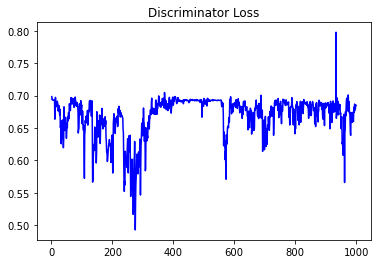

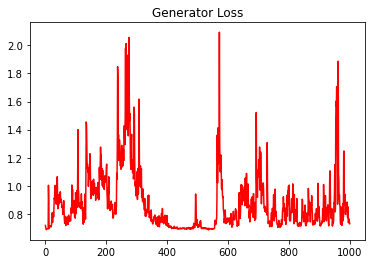

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.054885255846787585


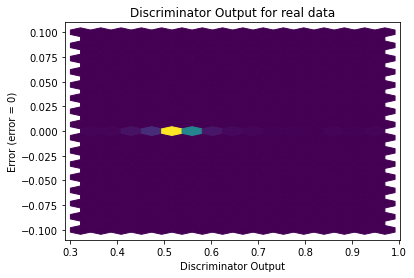

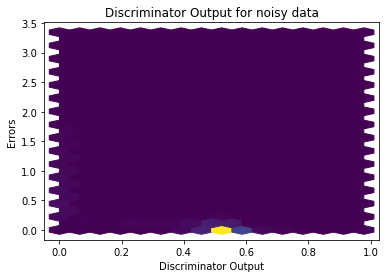

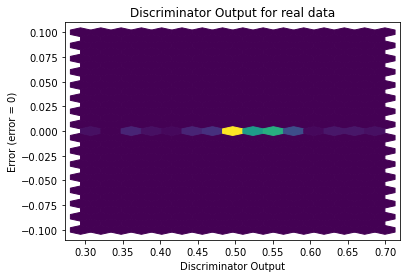

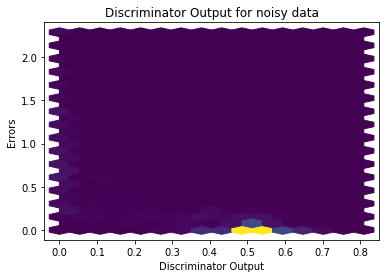

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

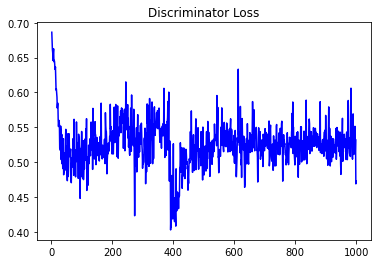

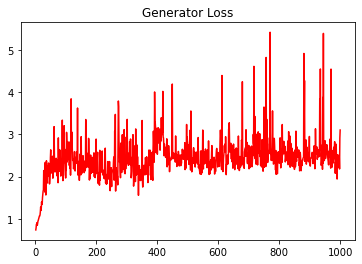

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.14658856200852563


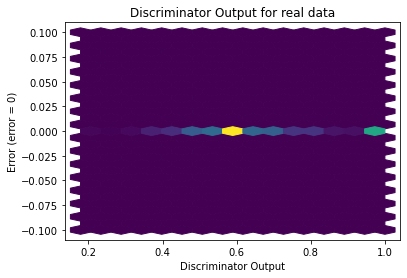

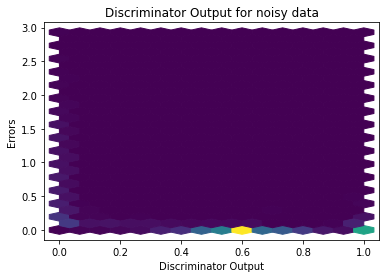

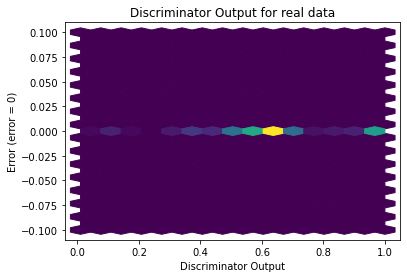

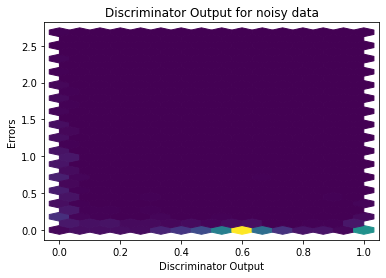

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


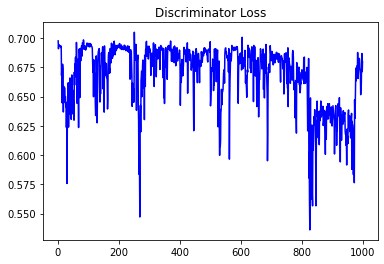

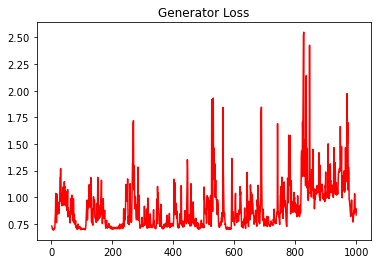

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.060457665439356455


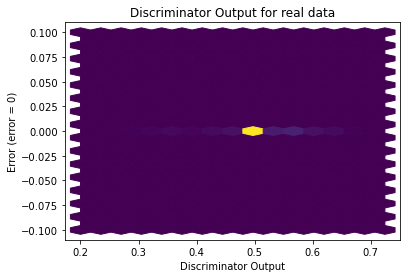

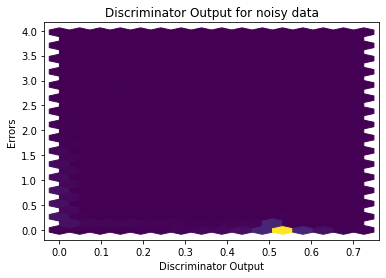

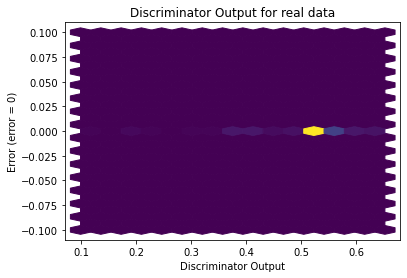

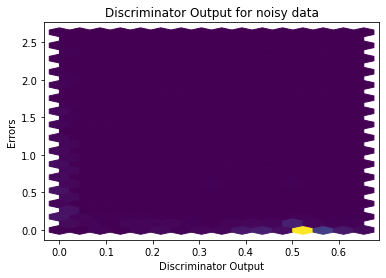

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


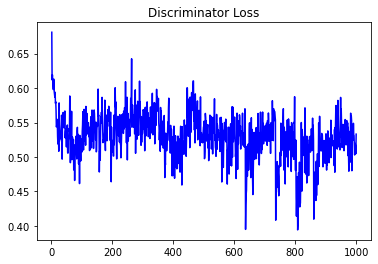

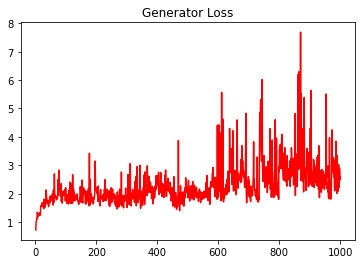

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.09709422321216046


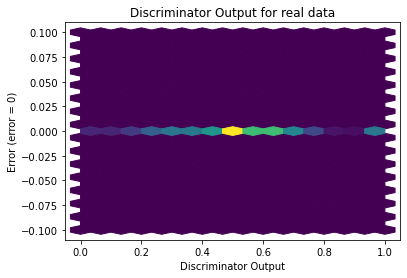

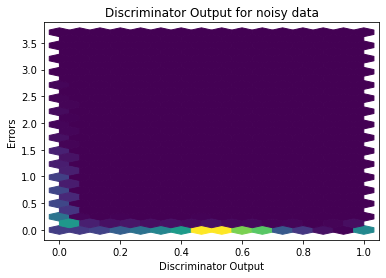

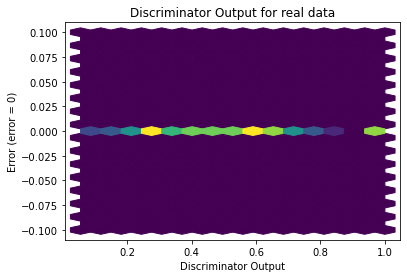

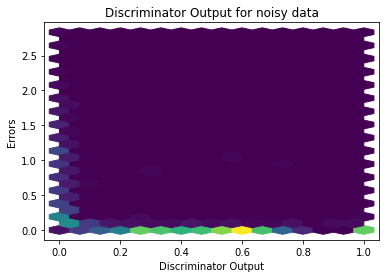

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9753]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9916]], requires_grad=True)
